# SC1015 MINI PROJECT
## GROUP 3
#### Members: Lim Yi Yang (YLIM215), Chong Xin Yi (XCHONG010)
---

# Heart Attack Risk Prediction in Indonesian Adults
---

## 1. Problem Definition
### Objective: To identify which lifestyle and clinical risk factors best predict heart attacks among adults in Indonesia.
Problem Statement: The rising prevalence of heart attacks necessitates a deeper understanding of the key risk factors contributing to heart disease. This study aims to identify and evaluate the most significant lifestyle and clinical risk factors associated with heart attacks in Indonesia, using machine learning models. By pinpointing high-risk factors such as cholesterol levels, hypertension, and diabetes, this research seeks to provide actionable insights for improving heart health management and prevention strategies.

Motivation: Identifying critical risk factors can significantly enhance preventive healthcare measures, focus healthcare sources more effectively, ultimately improving public health outcomes in Indonesia. These insights can serve as a reference to better health outcomes globally.

Research Questions:
- Which lifestyle and clinical risk factors are most strongly correlated with heart attacks?
- Can we develop a reliable predictive model for heart attack occurrence?
- What actionable insights can be derived from the analysis to improve heart disease prevention strategies?

---


## 2. Data Preparation & Cleaning

Source of dataset: Kaggle: Heart Attack Prediction in Indonesia *by Ankush Panday* \
 (https://www.kaggle.com/datasets/ankushpanday2/heart-attack-prediction-in-indonesia?resource=download)



🔍 Variable Definitions (Full Description)

Demographics
age (int): Age of the individual (25-90 years)
gender (str): Gender of the individual (Male, Female)
region (str): Living area (Urban, Rural)
income_level (str): Socioeconomic status (Low, Middle, High)
Clinical Risk Factors
hypertension (int): High blood pressure (1 = Yes, 0 = No)
diabetes (int): Diagnosed diabetes (1 = Yes, 0 = No)
cholesterol_level (int): Total cholesterol level (mg/dL)
obesity (int): BMI > 30 (1 = Yes, 0 = No)
waist_circumference (int): Waist circumference in cm
family_history (int): Family history of heart disease (1 = Yes, 0 = No)
Lifestyle & Behavioral Factors
smoking_status (str): Smoking habit (Never, Past, Current)
alcohol_consumption (str): Alcohol intake (None, Moderate, High)
physical_activity (str): Physical activity level (Low, Moderate, High)
dietary_habits (str): Diet quality (Healthy, Unhealthy)
Environmental & Social Factors
air_pollution_exposure (str): Pollution exposure (Low, Moderate, High)
stress_level (str): Stress level (Low, Moderate, High)
sleep_hours (float): Average sleep hours per night (3-9 hours)
Medical Screening & Health System Factors
blood_pressure_systolic (int): Systolic BP (mmHg)
blood_pressure_diastolic (int): Diastolic BP (mmHg)
fasting_blood_sugar (int): Blood sugar level (mg/dL)
cholesterol_hdl (int): HDL cholesterol level (mg/dL)
cholesterol_ldl (int): LDL cholesterol level (mg/dL)
triglycerides (int): Triglyceride level (mg/dL)
EKG_results (str): Electrocardiogram result (Normal, Abnormal)
previous_heart_disease (int): Prior heart disease (1 = Yes, 0 = No)
medication_usage (int): Currently taking heart-related medications (1 = Yes, 0 = No)
participated_in_free_screening (int): Attended Indonesia’s free health screening program (1 = Yes, 0 = No)
Target Variable
heart_attack (int): Heart attack occurrence (1 = Yes, 0 = No)

In [39]:
# Importing Essential Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [40]:
# Load the dataset 
data = pd.read_csv('heart_attack_prediction_indonesia.csv')
data.head()


,age,gender,region,income_level,hypertension,diabetes,cholesterol_level,obesity,waist_circumference,family_history,smoking_status,alcohol_consumption,physical_activity,dietary_habits,air_pollution_exposure,stress_level,sleep_hours,blood_pressure_systolic,blood_pressure_diastolic,fasting_blood_sugar,cholesterol_hdl,cholesterol_ldl,triglycerides,EKG_results,previous_heart_disease,medication_usage,participated_in_free_screening,heart_attack
0,60,Male,Rural,Middle,0,1,211,0,83,0,Never,NaN,High,Unhealthy,Moderate,Moderate,5.9706,113,62,173,48,121,101,Normal,0,0,0,0
1,53,Female,Urban,Low,0,0,208,0,106,1,Past,NaN,Moderate,Healthy,High,High,5.6438,132,76,70,58,83,138,Normal,1,0,1,0
2,62,Female,Urban,Low,0,0,231,1,112,1,Past,Moderate,Moderate,Healthy,Low,Low,6.3362,116,74,118,69,130,171,Abnormal,0,1,0,1
3,73,Male,Urban,Low,1,0,202,0,82,1,Never,Moderate,Moderate,Unhealthy,Low,High,7.9130,136,65,98,52,85,146,Normal,0,1,1,0
4,52,Male,Urban,Middle,1,0,232,0,89,0,Current,Moderate,Moderate,Unhealthy,High,Moderate,3.2523,127,75,104,59,127,139,Normal,1,0,1,1


### Data Overview

In [41]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             63507 non-null   object 
 12  physical_activit

String 'None' under 'alcohol_consumption' mistaken as missing value.


Hence, when reading the CSV, prevent pandas from treating 'None' as NaN. \
na_values = [] tell pandas: "Don't treat any string as missing."
keep_default_na = False: disables the default behaviour that turns 'None' into NaN


In [42]:
data = pd.read_csv('heart_attack_prediction_indonesia.csv', na_values=[], keep_default_na=False)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158355 entries, 0 to 158354
Data columns (total 28 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   age                             158355 non-null  int64  
 1   gender                          158355 non-null  object 
 2   region                          158355 non-null  object 
 3   income_level                    158355 non-null  object 
 4   hypertension                    158355 non-null  int64  
 5   diabetes                        158355 non-null  int64  
 6   cholesterol_level               158355 non-null  int64  
 7   obesity                         158355 non-null  int64  
 8   waist_circumference             158355 non-null  int64  
 9   family_history                  158355 non-null  int64  
 10  smoking_status                  158355 non-null  object 
 11  alcohol_consumption             158355 non-null  object 
 12  physical_activit

Now there's no missing value.

In [43]:
print(data.describe())



               age  hypertension     diabetes  cholesterol_level      obesity  \
count 158,355.0000  158,355.0000 158,355.0000       158,355.0000 158,355.0000   
mean       54.5438        0.2991       0.1998           199.5333       0.2499   
std        11.9109        0.4579       0.3999            39.7376       0.4330   
min        25.0000        0.0000       0.0000           100.0000       0.0000   
25%        46.0000        0.0000       0.0000           172.0000       0.0000   
50%        55.0000        0.0000       0.0000           199.0000       0.0000   
75%        63.0000        1.0000       0.0000           226.0000       0.0000   
max        90.0000        1.0000       1.0000           350.0000       1.0000   

       waist_circumference  family_history  sleep_hours  \
count         158,355.0000    158,355.0000 158,355.0000   
mean               93.2685          0.3002       6.4801   
std                16.3822          0.4584       1.4254   
min                20.0000        

In [44]:
data.dtypes

age                                 int64
gender                             object
region                             object
income_level                       object
hypertension                        int64
diabetes                            int64
cholesterol_level                   int64
obesity                             int64
waist_circumference                 int64
family_history                      int64
smoking_status                     object
alcohol_consumption                object
physical_activity                  object
dietary_habits                     object
air_pollution_exposure             object
stress_level                       object
sleep_hours                       float64
blood_pressure_systolic             int64
blood_pressure_diastolic            int64
fasting_blood_sugar                 int64
cholesterol_hdl                     int64
cholesterol_ldl                     int64
triglycerides                       int64
EKG_results                       

---
## 3. Exploratory Data Analysis (EDA)
Goal: Understand how each variable relates to the **target variable**: 'heart_attack (0=No, 1=Yes)'\
Filter those that are more relevant for further analysis and testing\
For variables with Numeric Features (e.g., age, cholestrol_level, sleep_hours), we will be using:
- Violinplot
- Histogram

For variables with Categoric Features (e.g., gender, region, diet), we will be using:
- Countplot
- Heatmap

### Numeric Features

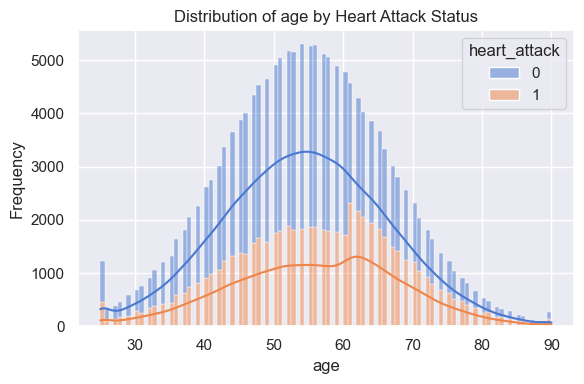

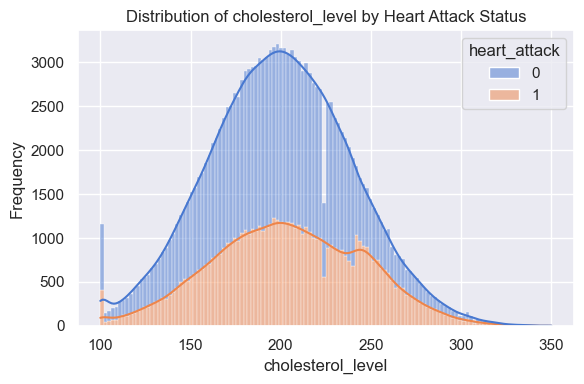

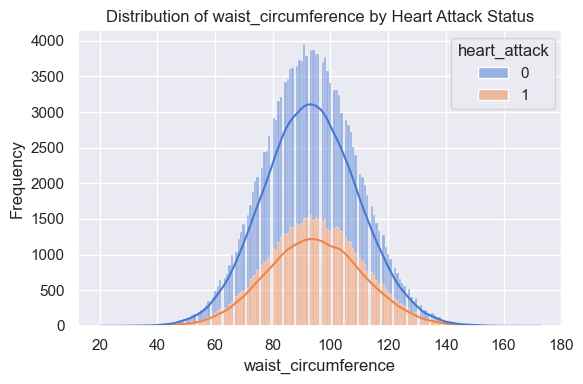

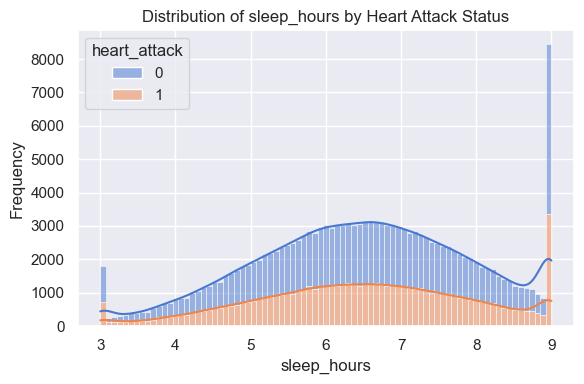

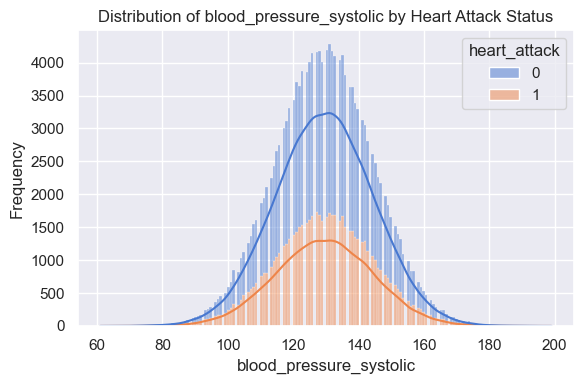

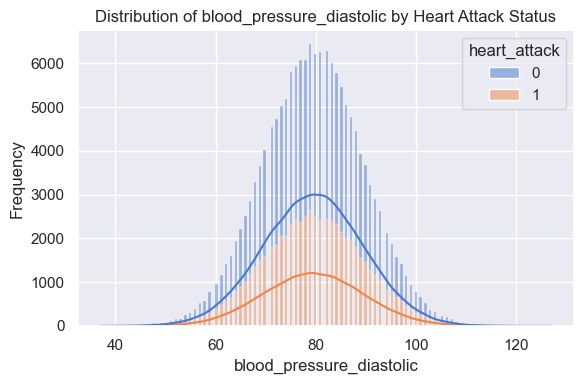

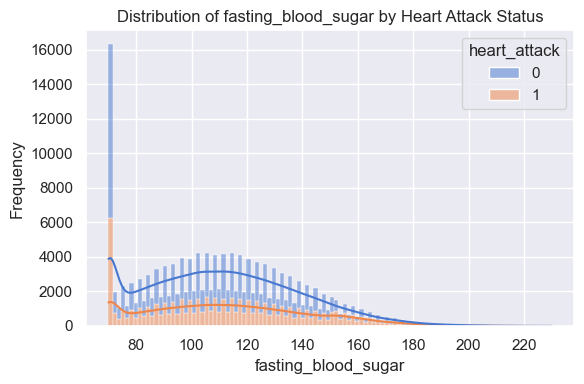

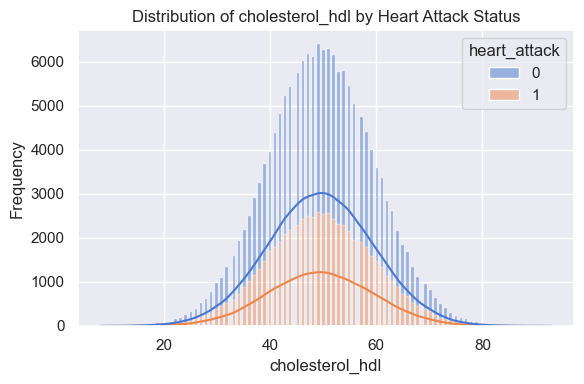

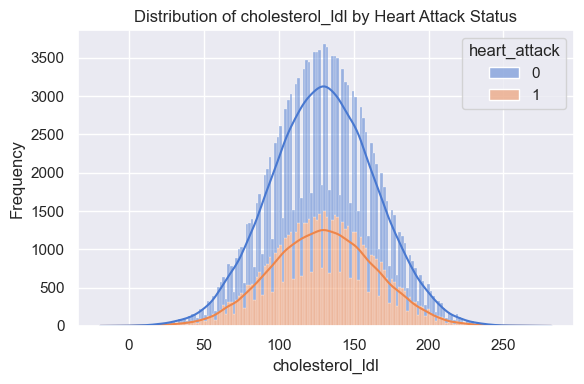

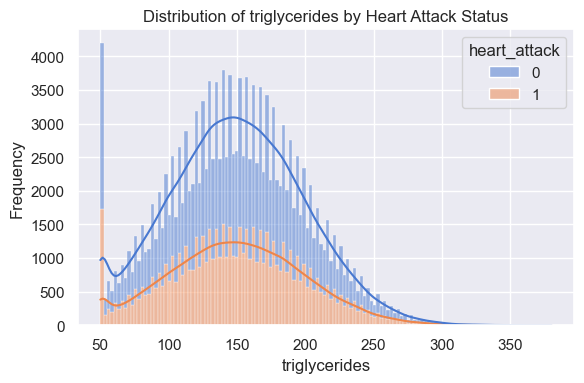

In [45]:
# Starting with Histograms for Initial Exploration
numeric_featuresx = data.select_dtypes(include=['int64', 'float64']).drop(columns='heart_attack').columns
# Those with values '0' and '1' only are considered categorical in this case
numeric_features = [col for col in numeric_featuresx if set(data[col].unique()) !={0,1}]
for col in numeric_features:
    plt.figure(figsize=(6,4))
    sns.histplot(data=data, x=col, hue='heart_attack', kde=True, multiple="stack", palette="muted")
    plt.title(f'Distribution of {col} by Heart Attack Status')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()

    plt.show()


#### Evaluate distribution separation
1. Kolmogorov-Smirnov(KS) test\
KS Statistic = how different the two distributions are in shape.\
KS p-value = small p-values indicate a statistically significant difference.
2. Separation Score = how far apart the two distributions are (in terms of standard deviation).



In [46]:
from scipy.stats import skew, ks_2samp

def evaluate_histogram_features(data, target='heart_attack'):
    
    results = []

    for col in numeric_features:
        group0 = data[data[target] == 0][col].dropna()
        group1 = data[data[target] == 1][col].dropna()

        mean_diff = group1.mean() - group0.mean()
        skew_0 = skew(group0)
        skew_1 = skew(group1)
        ks_stat, ks_p = ks_2samp(group0, group1)

        separation_score = abs(mean_diff) / np.sqrt(group0.std()**2 + group1.std()**2)

        results.append({
            'Feature': col,
            'Mean_HeartAttack1': round(group1.mean(), 2),
            'Mean_HeartAttack0': round(group0.mean(), 2),
            'Mean_Diff': round(mean_diff, 2),
            'Skew_HA0': round(skew_0, 2),
            'Skew_HA1': round(skew_1, 2),
            'Separation_Score': round(separation_score, 2),
            'KS_Statistic': round(ks_stat, 3),
            'KS_p_value': round(ks_p, 3)
        })

    result_data = pd.DataFrame(results).sort_values(by='Separation_Score', ascending=False)
    return result_data


In [47]:
result_summary = evaluate_histogram_features(data)
display(result_summary)


,Feature,Mean_HeartAttack1,Mean_HeartAttack0,Mean_Diff,Skew_HA0,Skew_HA1,Separation_Score,KS_Statistic,KS_p_value
0,age,56.0800,53.5100,2.5700,0.1000,-0.0900,0.1500,0.1320,0.0000
1,cholesterol_level,204.0300,196.5200,7.5100,0.0200,0.0100,0.1300,0.1040,0.0000
2,waist_circumference,94.6300,92.3600,2.2700,0.0600,0.0600,0.1000,0.0590,0.0000
6,fasting_blood_sugar,113.1000,109.1600,3.9400,0.3600,0.3900,0.1000,0.0640,0.0000
3,sleep_hours,6.4800,6.4800,0.0000,-0.1700,-0.1600,0.0000,0.0040,0.4250
4,blood_pressure_systolic,129.4900,129.5400,-0.0500,-0.0100,-0.0000,0.0000,0.0040,0.6560
5,blood_pressure_diastolic,79.4900,79.4900,-0.0100,-0.0100,0.0000,0.0000,0.0040,0.5170
7,cholesterol_hdl,49.5000,49.4900,0.0100,-0.0200,0.0100,0.0000,0.0040,0.6270
8,cholesterol_ldl,129.6000,129.5500,0.0500,-0.0000,-0.0000,0.0000,0.0020,0.9730
9,triglycerides,149.6700,149.7400,-0.0700,0.1300,0.1300,0.0000,0.0030,0.8100


## Implications
Top Features (by Separation_Score, KS_Statistics and KS_p_vaue) \
These are the **most potentially useful** numeric predictors of heart_attack:
- **age**
- **cholesterol_level**
- **waist_circumference**
- **fasting_blood_sugar**


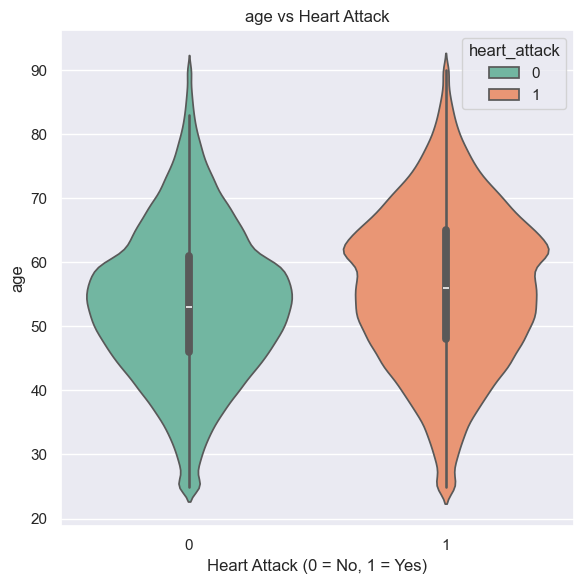

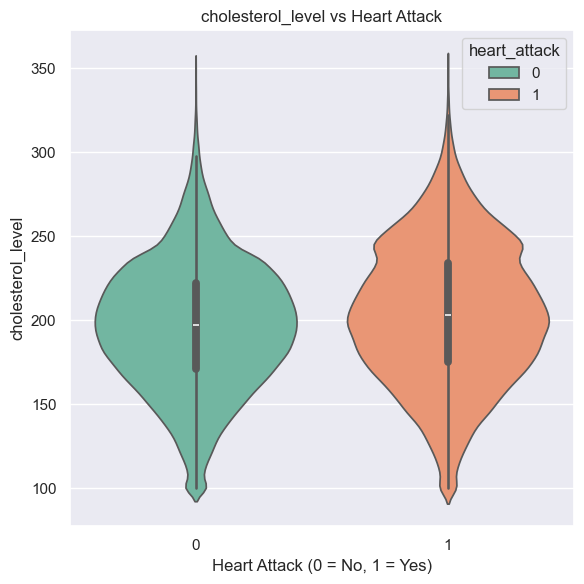

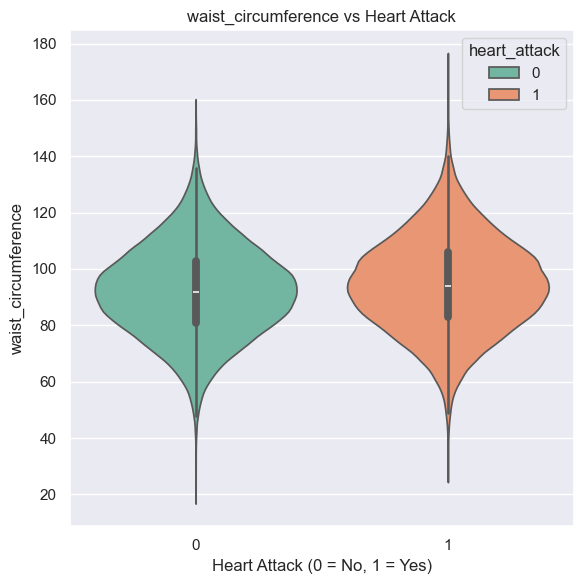

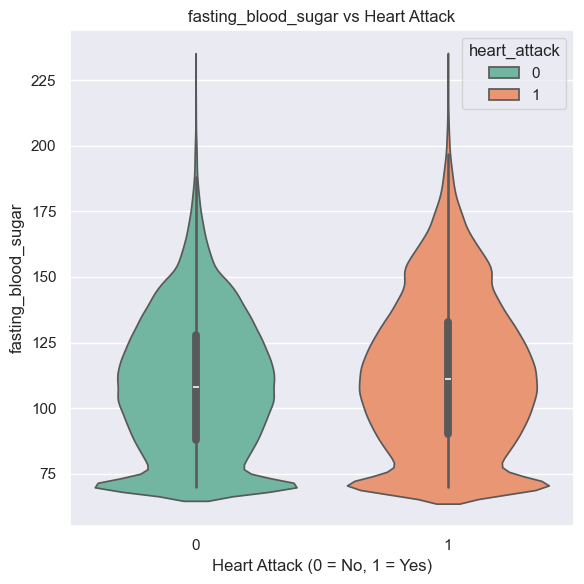

In [48]:
# Violin plot for the most potentially useful numeric predictors
useful_numeric = data[['age', 'cholesterol_level', 'waist_circumference', 'fasting_blood_sugar']]

for col in useful_numeric:
    plt.figure(figsize=(6,6))
    sns.violinplot(x='heart_attack', y=col, data=data, palette='Set2', hue= 'heart_attack')
    plt.title(f'{col} vs Heart Attack')
    plt.xlabel('Heart Attack (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

age
- Higher age(>60), higher heart attack rates

cholesterol_level
- High cholesterol level (>230), higher heart attack rates

waist_circumference
- Greater waist_circumference, higher heart attack rates
- No heart attack rates with small waist cicrumference

fasting_blood_sugar
- Especially higher heart attack rates with fasting blood sugar over 150

### Categorical Features

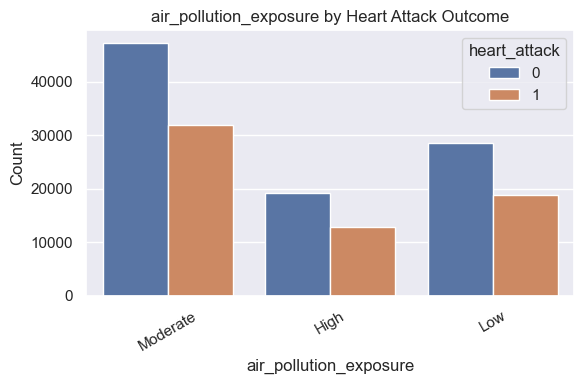

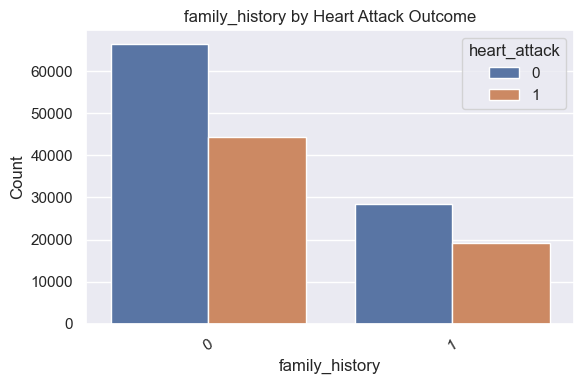

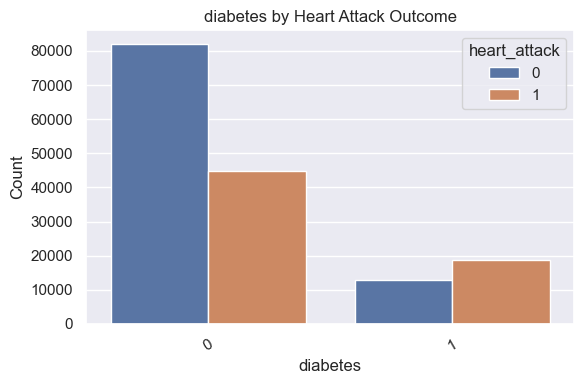

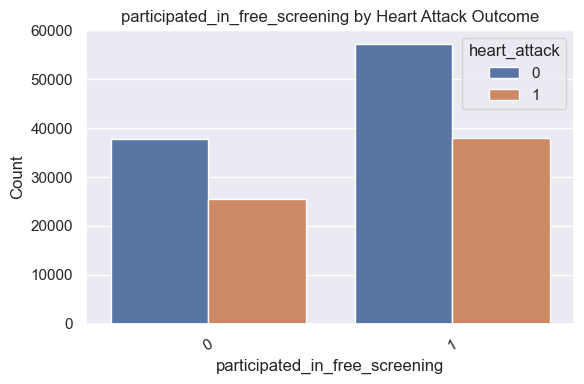

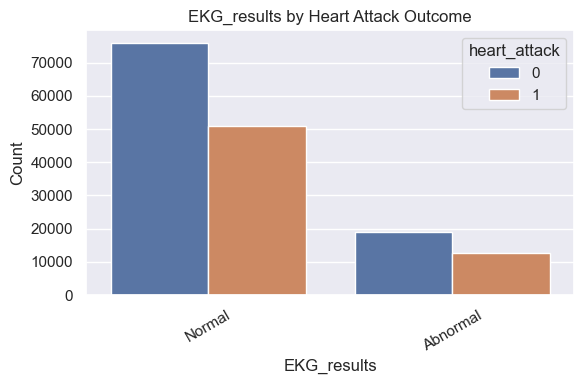

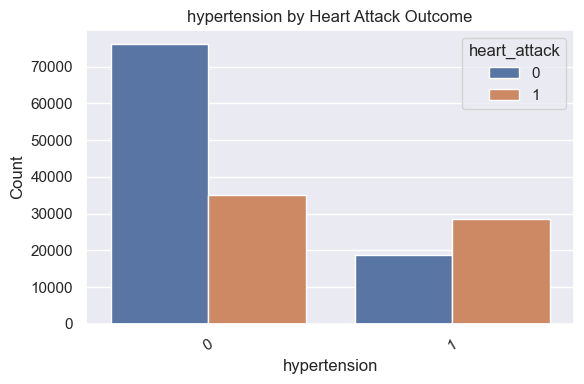

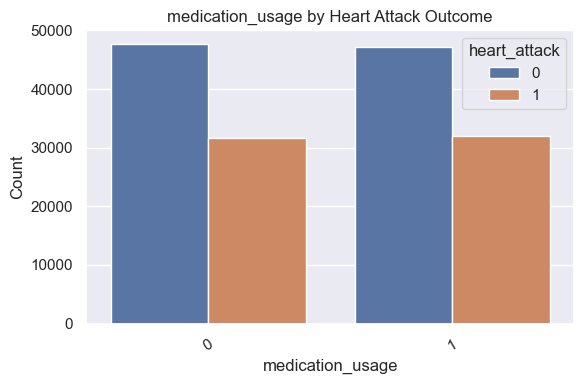

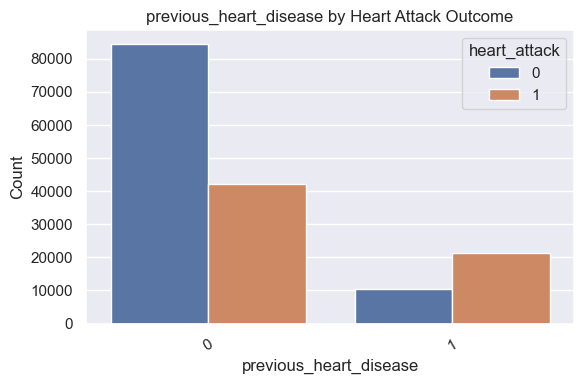

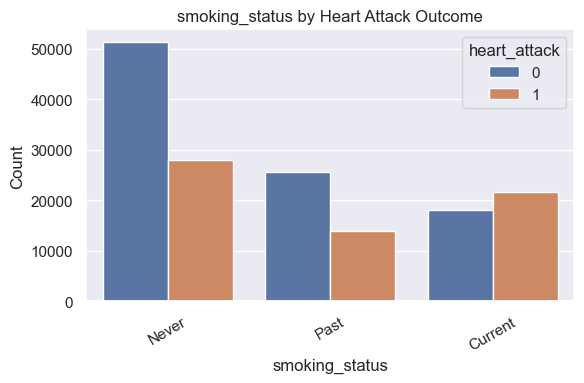

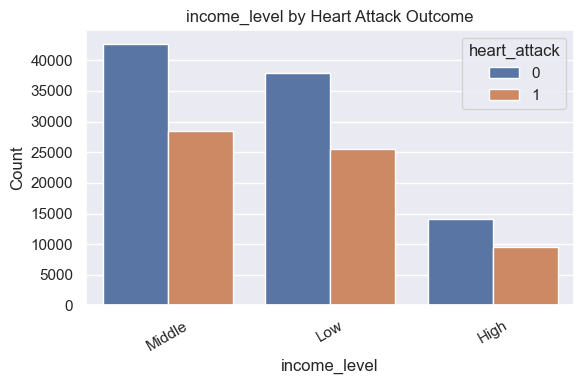

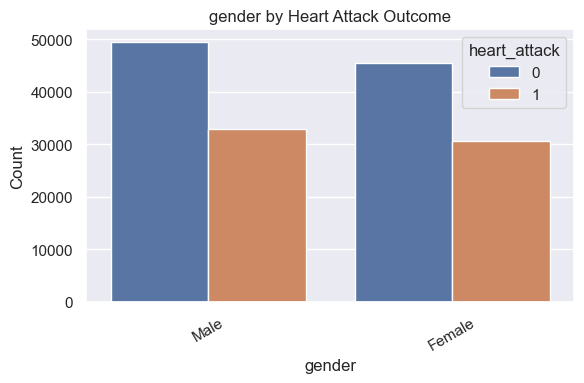

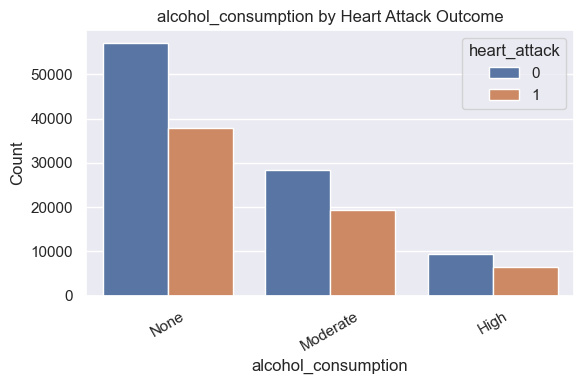

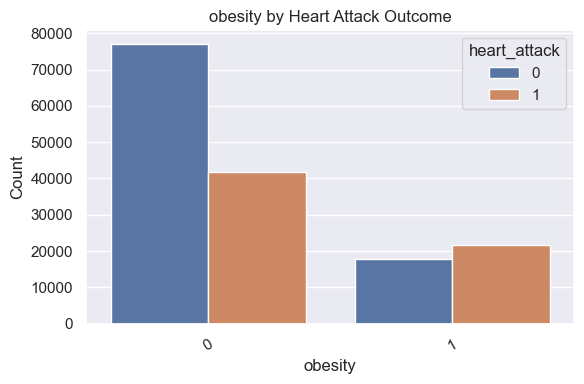

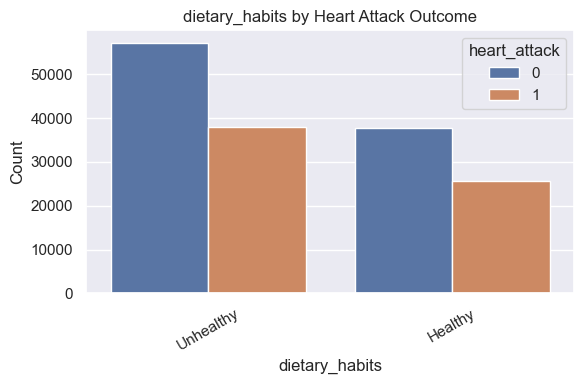

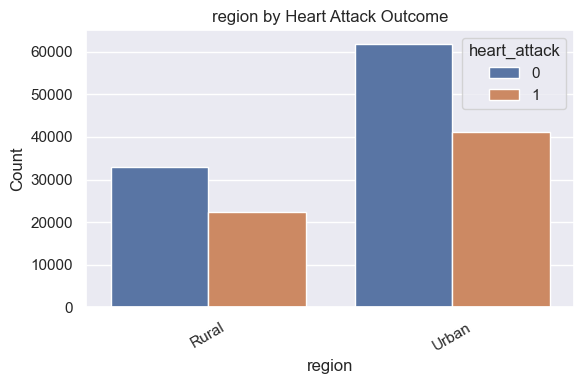

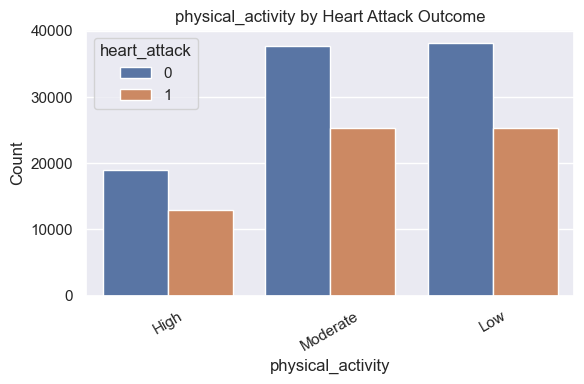

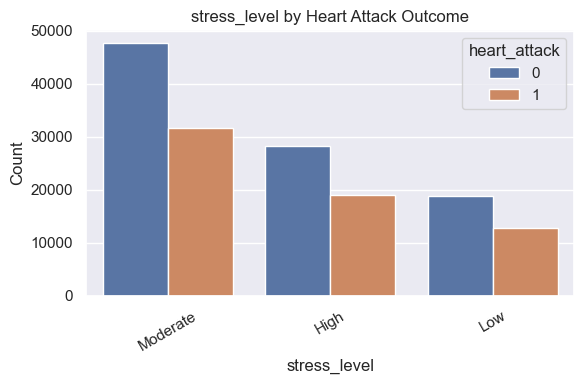

In [49]:
# Select categorical features (object types and binary columns with only '0' and '1')
categorical_features = data.select_dtypes(include=['object'])

binary_categorical_features = [col for col in data.columns if set(data[col].unique()) == {0, 1} and col != 'heart_attack']

# Combine both the object-type and binary columns
categorical_features = list(set(categorical_features).union(binary_categorical_features))

# Plot countplots for each categorical variable
for col in categorical_features:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='heart_attack', data=data)
    plt.title(f'{col} by Heart Attack Outcome')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()


### Heatmap with Chi-Square Test
“Is the distribution of heart attack status different across the categories of {variables in categorical_features}?”


- Darker/redder color = stronger relationship (smaller p-value).

- p < 0.05 → the variable is significantly related to heart_attack.

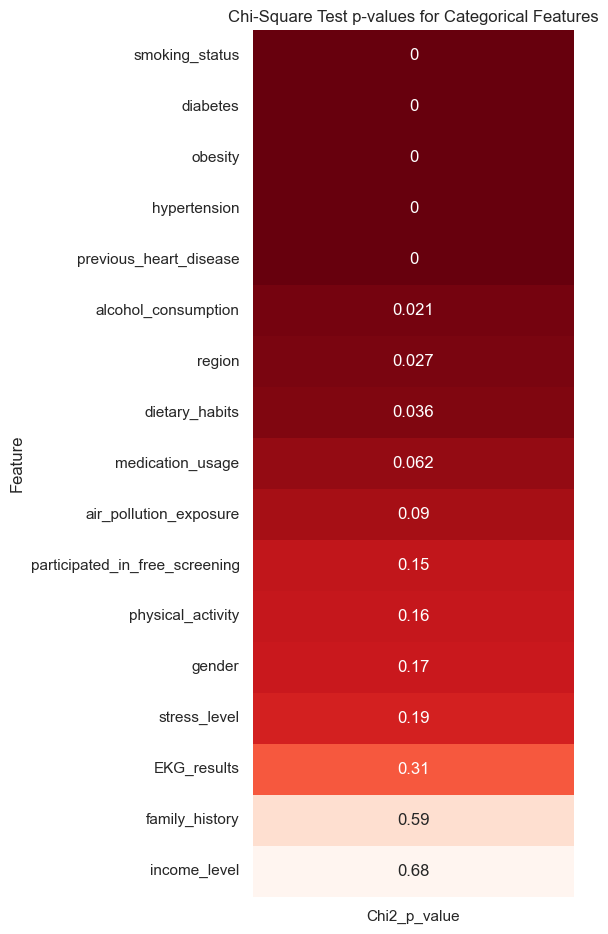

In [50]:
from scipy.stats import chi2_contingency

# Store p-values
chi2_results = []

for col in categorical_features:
    contingency_table = pd.crosstab(data[col], data['heart_attack'])
    chi2, p, _, _ = chi2_contingency(contingency_table)
    chi2_results.append({'Feature': col, 'Chi2_p_value': round(p, 4)})

# Convert to DataFrame
chi2_df = pd.DataFrame(chi2_results).set_index('Feature').sort_values('Chi2_p_value')


# Create a heatmap
plt.figure(figsize=(6, len(categorical_features)*0.5 + 1))
sns.heatmap(chi2_df, annot=True, cmap='Reds_r', cbar=False)
plt.title('Chi-Square Test p-values for Categorical Features')
plt.tight_layout()
plt.show()


#### Implications
**Significant Variables (p<= 0.05)**
- hypertension
- diabetes
- previous_heart_disease
- smoking_status
- obesity
- alcohol_consumption
- region
- dietary_habits

**Less/none significant Variables (p>0.05)**
- medication_usage- air_pollution_exposure
- gender 
- physical_activity
- stress_level
- participated_in_free_screening
- EKG_results
- income_level
- family_history 


In [51]:
# Check if accounted for all variables, there should be (total columns - 1 = 28-1 = 27)
print(len(categorical_features))
print(len(numeric_features))

17
10


---
## 4. Machine Learning Modeling

Predictor Variable : variables classified as useful above -- both numeric & categorical \
Response (target) Feature : `heart_attack`    

#### Decision Tree
- Easy to interpret
- Fast and simple
- Prone to overfitting
- May perform worse than ensemble methods

#### Ensemble model: CatBoost
- Reduce overfitting(boosting=focus on what previous tree got wrong)
- Improve generalization
- Still tree-based under the hood


### Using Decision Tree & Confusion Matrix

=== Using predictor: hypertension ===


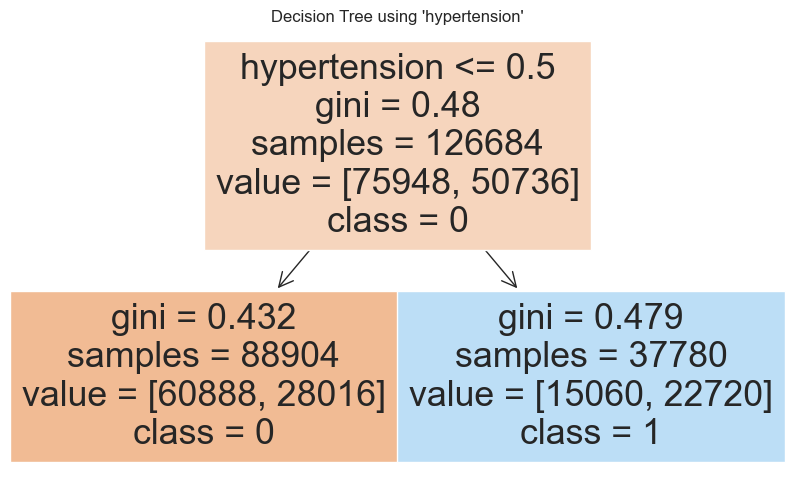

True Positives (TP): 5839
False Positives (FP): 3740
True Negatives (TN): 15166
False Negatives (FN): 6926
Accuracy: 0.6632
Precision: 0.6096
Recall: 0.4574
F1 Score: 0.5226



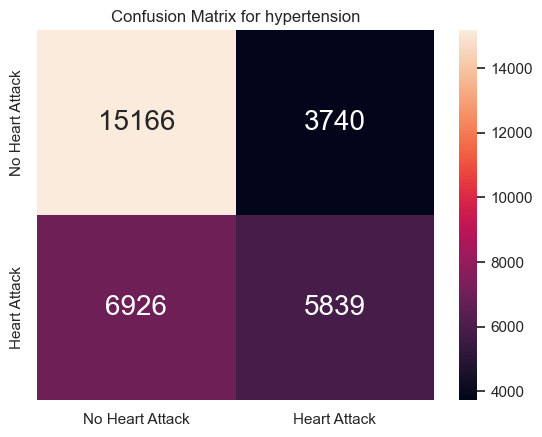

=== Using predictor: diabetes ===


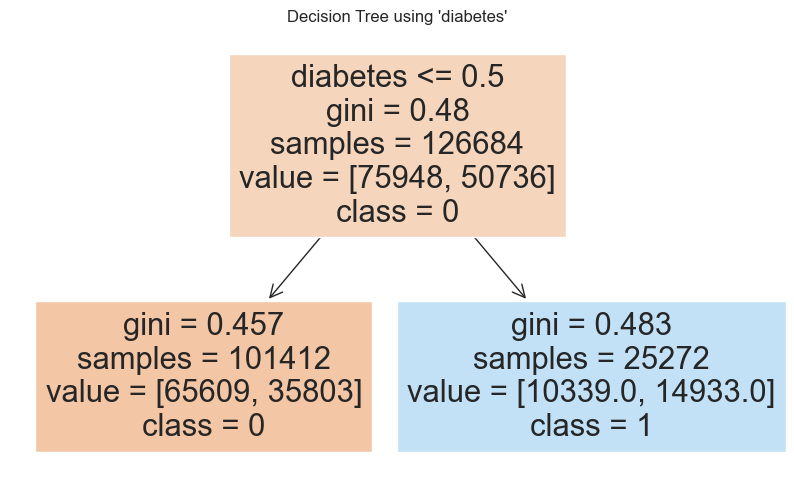

True Positives (TP): 3791
False Positives (FP): 2577
True Negatives (TN): 16329
False Negatives (FN): 8974
Accuracy: 0.6353
Precision: 0.5953
Recall: 0.2970
F1 Score: 0.3963



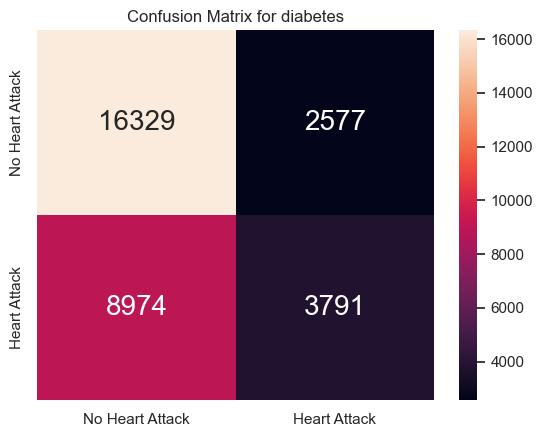

=== Using predictor: previous_heart_disease ===


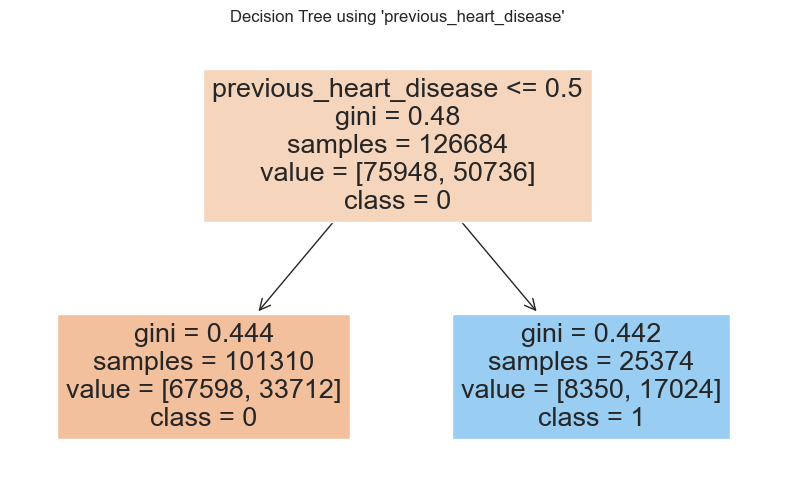

True Positives (TP): 4252
False Positives (FP): 2136
True Negatives (TN): 16770
False Negatives (FN): 8513
Accuracy: 0.6638
Precision: 0.6656
Recall: 0.3331
F1 Score: 0.4440



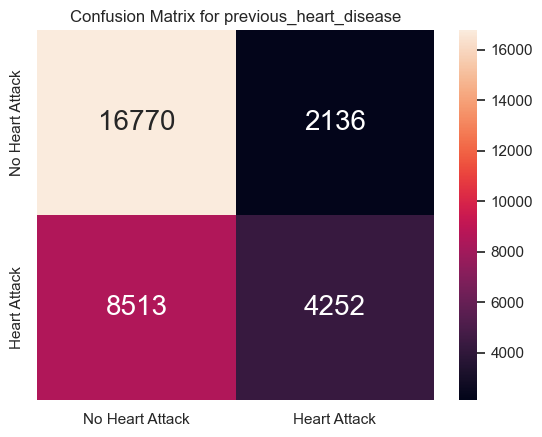

=== Using predictor: smoking_status ===


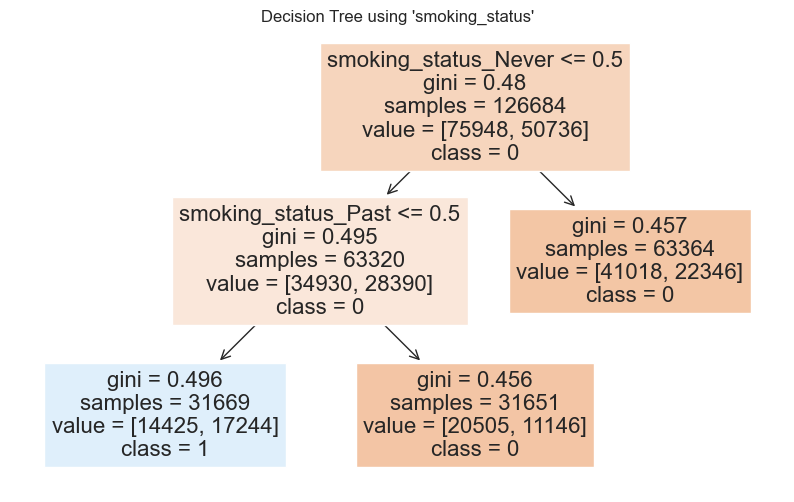

True Positives (TP): 4455
False Positives (FP): 3647
True Negatives (TN): 15259
False Negatives (FN): 8310
Accuracy: 0.6225
Precision: 0.5499
Recall: 0.3490
F1 Score: 0.4270



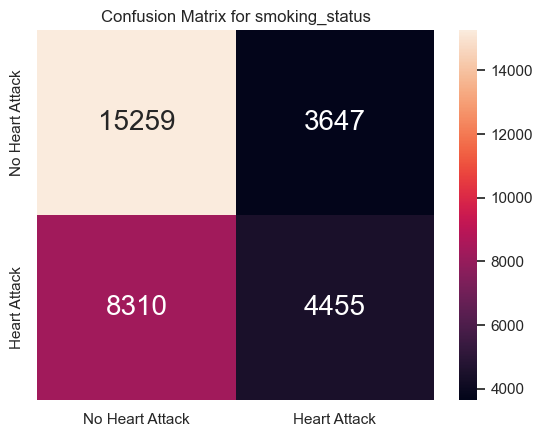

=== Using predictor: obesity ===


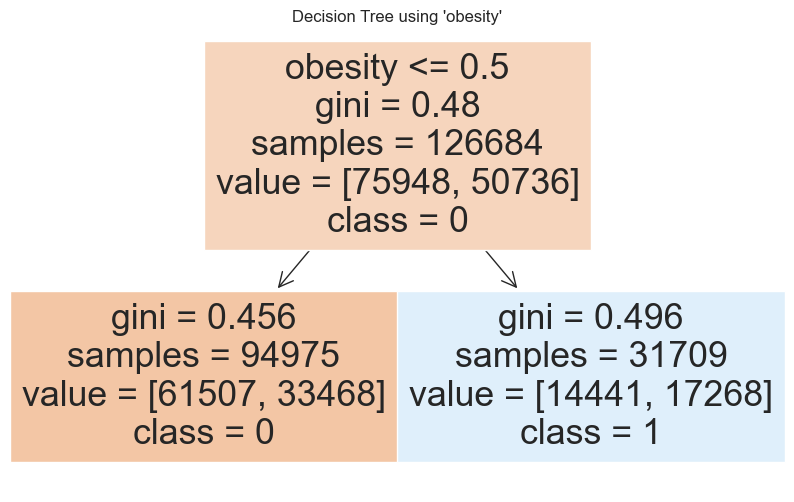

True Positives (TP): 4371
False Positives (FP): 3493
True Negatives (TN): 15413
False Negatives (FN): 8394
Accuracy: 0.6247
Precision: 0.5558
Recall: 0.3424
F1 Score: 0.4238



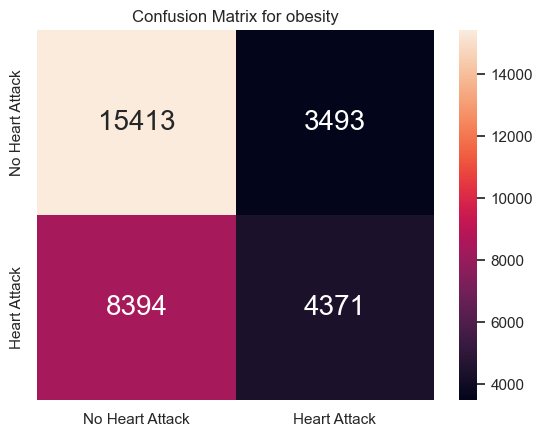

=== Using predictor: alcohol_consumption ===


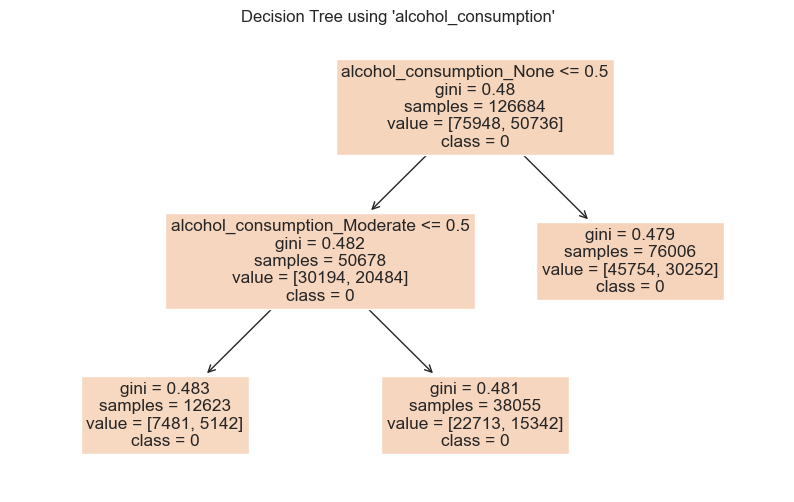

True Positives (TP): 0
False Positives (FP): 0
True Negatives (TN): 18906
False Negatives (FN): 12765
Accuracy: 0.5969
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000



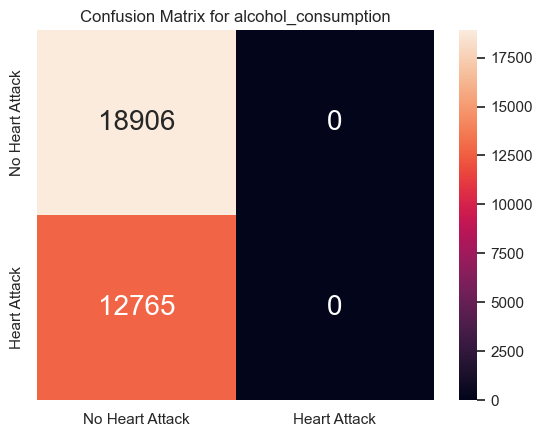

=== Using predictor: region ===


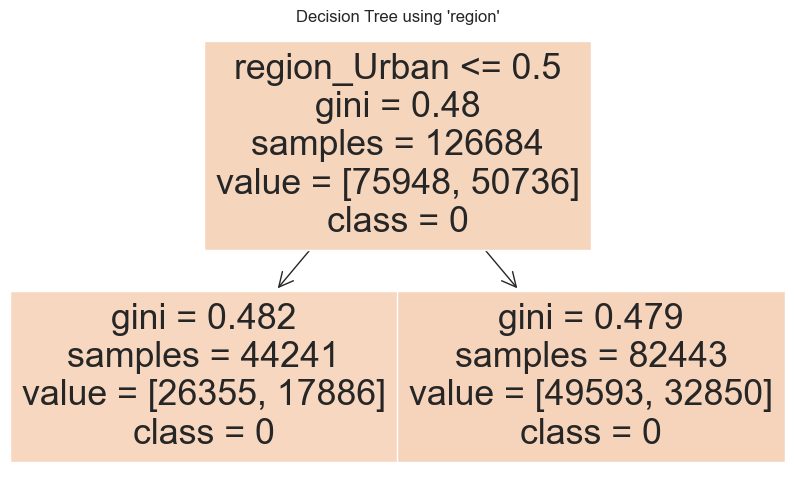

True Positives (TP): 0
False Positives (FP): 0
True Negatives (TN): 18906
False Negatives (FN): 12765
Accuracy: 0.5969
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000



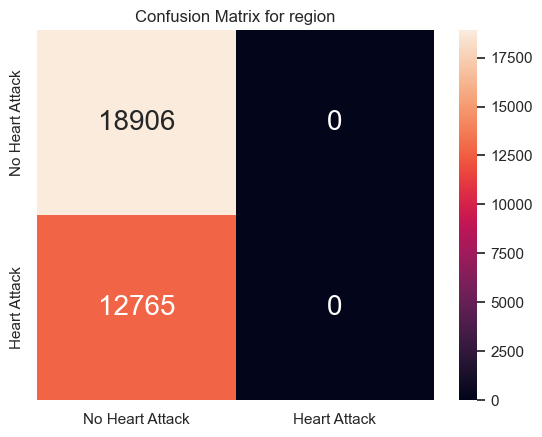

=== Using predictor: dietary_habits ===


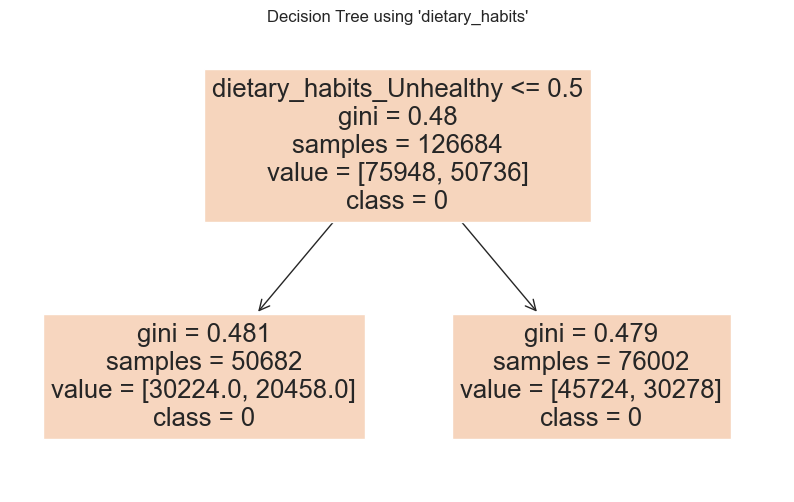

True Positives (TP): 0
False Positives (FP): 0
True Negatives (TN): 18906
False Negatives (FN): 12765
Accuracy: 0.5969
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000



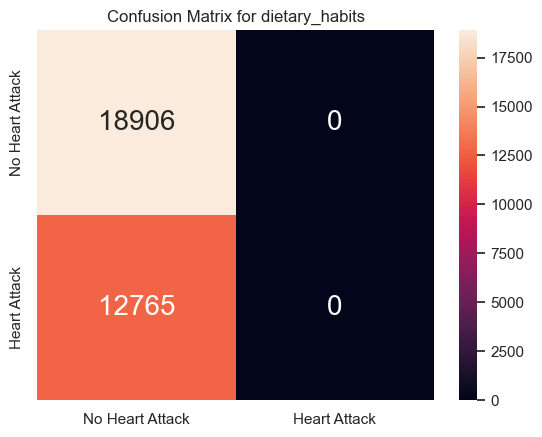

=== Using predictor: age ===


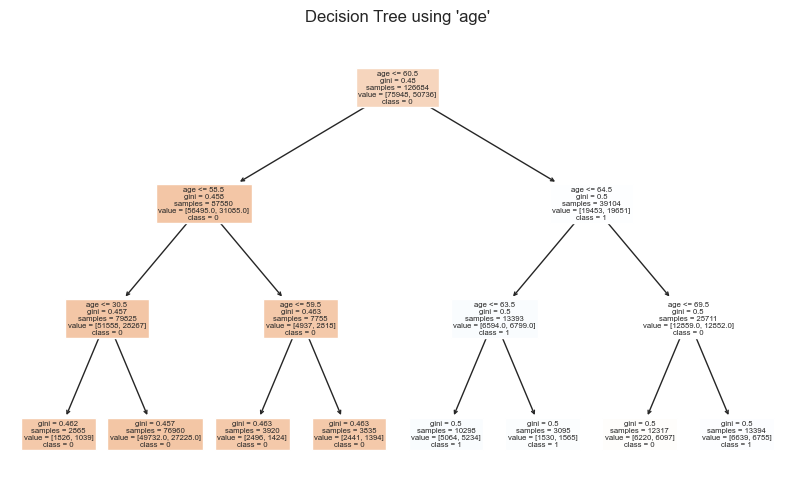

True Positives (TP): 3434
False Positives (FP): 3313
True Negatives (TN): 15593
False Negatives (FN): 9331
Accuracy: 0.6008
Precision: 0.5090
Recall: 0.2690
F1 Score: 0.3520



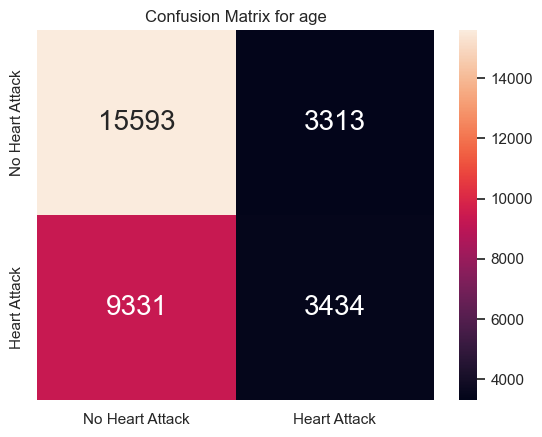

=== Using predictor: cholesterol_level ===


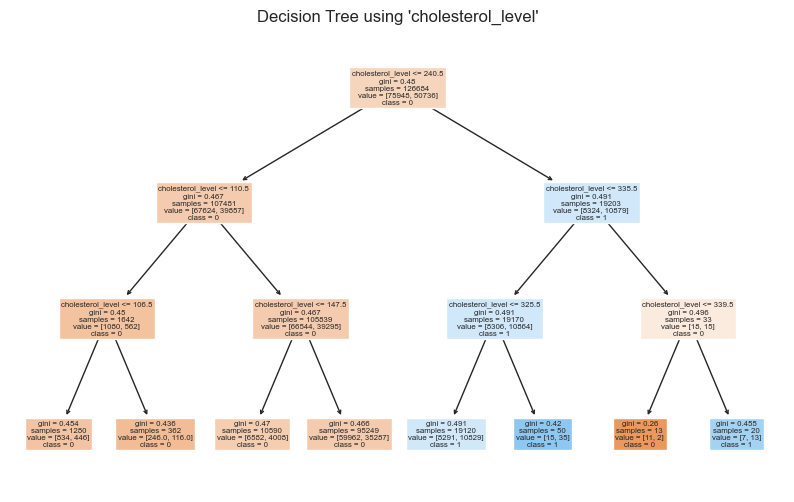

True Positives (TP): 2712
False Positives (FP): 2146
True Negatives (TN): 16760
False Negatives (FN): 10053
Accuracy: 0.6148
Precision: 0.5583
Recall: 0.2125
F1 Score: 0.3078



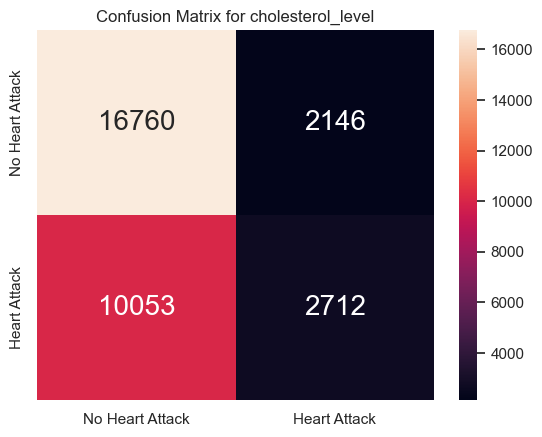

=== Using predictor: waist_circumference ===


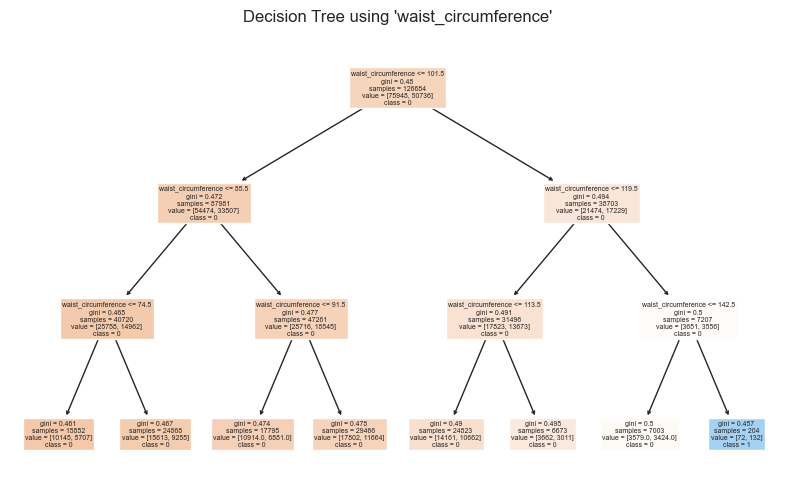

True Positives (TP): 29
False Positives (FP): 24
True Negatives (TN): 18882
False Negatives (FN): 12736
Accuracy: 0.5971
Precision: 0.5472
Recall: 0.0023
F1 Score: 0.0045



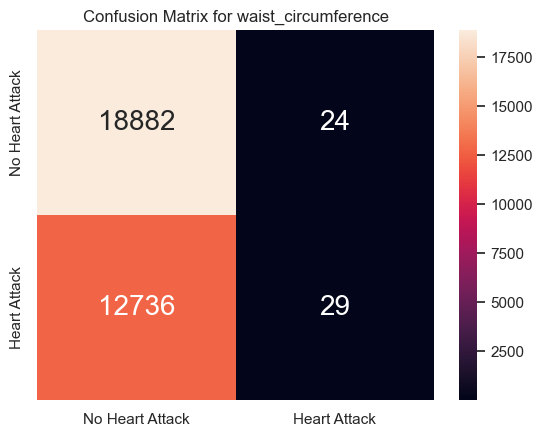

=== Using predictor: fasting_blood_sugar ===


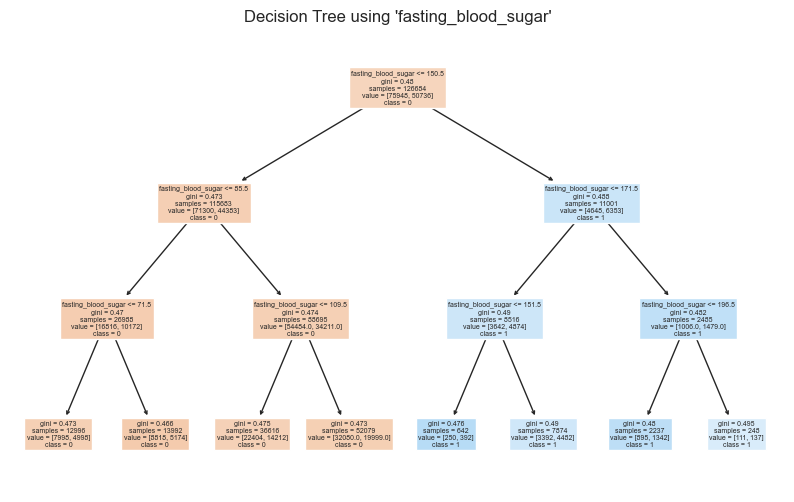

True Positives (TP): 1591
False Positives (FP): 1150
True Negatives (TN): 17756
False Negatives (FN): 11174
Accuracy: 0.6109
Precision: 0.5804
Recall: 0.1246
F1 Score: 0.2052



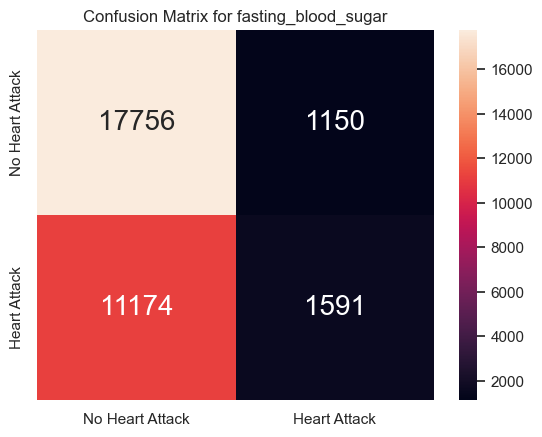

In [52]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


predictors = ['hypertension','diabetes','previous_heart_disease','smoking_status',
              'obesity','alcohol_consumption','region','dietary_habits',
              'age', 'cholesterol_level', 'waist_circumference', 'fasting_blood_sugar']
y = data['heart_attack']

results = []  # For storing the metrics of each predictor

for col in predictors:
    print(f"=== Using predictor: {col} ===")
    
    # Handle categorical features with one-hot encoding (if needed)
    if data[col].dtype == 'object' or data[col].dtype.name == 'category':
        X = pd.get_dummies(data[[col]], drop_first=True)
    else:
        X = data[[col]]  # numeric column stays as is

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Train a decision tree
    dectree = DecisionTreeClassifier(max_depth=3, random_state=42)
    dectree.fit(X_train, y_train)

    # Get probabilities
    probabilities = dectree.predict_proba(X_test)
    # Plot the trained tree
    plt.figure(figsize=(10, 6))
    plot_tree(dectree, filled=True, feature_names=X.columns, class_names=["0", "1"])
    plt.title(f"Decision Tree using '{col}'")
    plt.show()

    # Confusion Matrix & Accuracy
    dectree_test_pred = dectree.predict(X_test)
    
    # Calculate confusion matrix and extract TP, FP, TN, FN
    cm = confusion_matrix(y_test, dectree_test_pred)
    TN, FP, FN, TP = cm.ravel()

    # Print TP, FP, TN, FN
    print(f"True Positives (TP): {TP}")
    print(f"False Positives (FP): {FP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Negatives (FN): {FN}")

    # Accuracy, Precision, Recall, F1 Score
    accuracy = accuracy_score(y_test, dectree_test_pred)
    precision = precision_score(y_test, dectree_test_pred, zero_division=0)
    recall = recall_score(y_test, dectree_test_pred)
    f1 = f1_score(y_test, dectree_test_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}\n")

    # Store the results
    results.append((col, TP, FP, TN, FN, accuracy, precision, recall, f1))

    # Plot the confusion matrix
    sns.heatmap(cm, annot=True, fmt=".0f", annot_kws={"size": 20}, xticklabels=["No Heart Attack", "Heart Attack"], yticklabels=["No Heart Attack", "Heart Attack"])
    plt.title(f"Confusion Matrix for {col}")
    plt.show()


In [53]:
pd.set_option('display.float_format', '{:,.4f}'.format)  # Format numbers to 4 decimal places
pd.set_option('display.max_columns', None) 

# Create a summary table
results_df = pd.DataFrame(results, columns=["Predictor", "TP", "FP", "TN", "FN", "Accuracy", "Precision", "Recall", "F1 Score"])

# Display the summary table in a clean format
display(results_df)


,Predictor,TP,FP,TN,FN,Accuracy,Precision,Recall,F1 Score
0,hypertension,5839,3740,15166,6926,0.6632,0.6096,0.4574,0.5226
1,diabetes,3791,2577,16329,8974,0.6353,0.5953,0.2970,0.3963
2,previous_heart_disease,4252,2136,16770,8513,0.6638,0.6656,0.3331,0.4440
3,smoking_status,4455,3647,15259,8310,0.6225,0.5499,0.3490,0.4270
4,obesity,4371,3493,15413,8394,0.6247,0.5558,0.3424,0.4238
5,alcohol_consumption,0,0,18906,12765,0.5969,0.0000,0.0000,0.0000
6,region,0,0,18906,12765,0.5969,0.0000,0.0000,0.0000
7,dietary_habits,0,0,18906,12765,0.5969,0.0000,0.0000,0.0000
8,age,3434,3313,15593,9331,0.6008,0.5090,0.2690,0.3520
9,cholesterol_level,2712,2146,16760,10053,0.6148,0.5583,0.2125,0.3078


### Using CatBoost Classifier

In [54]:
!pip install catboost

# Automatically detects and handles categorical columns; no need to encode manually



In [55]:
from catboost import CatBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import pandas as pd

# Assuming 'data' is your dataframe and 'heart_attack' is the target column
X = data[['hypertension', 'diabetes', 'previous_heart_disease', 'smoking_status',
          'obesity', 'alcohol_consumption', 'region', 'dietary_habits', 
          'age', 'cholesterol_level', 'waist_circumference', 'fasting_blood_sugar']]
y = data['heart_attack']

# Specify which columns are categorical (CatBoost will automatically handle encoding)
cat_features = ['hypertension','diabetes','previous_heart_disease','smoking_status',
              'obesity','alcohol_consumption','region','dietary_habits'] 

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train CatBoostClassifier
model = CatBoostClassifier(iterations=500, 
                           learning_rate=0.05, 
                           depth=6, 
                           eval_metric='AUC', 
                           random_seed=42, 
                           cat_features=cat_features, 
                           verbose=100)

# Fit the model
model.fit(X_train, y_train, eval_set=(X_test, y_test), use_best_model=True)

# Make predictions and evaluate
y_pred = model.predict(X_test)
y_probs = model.predict_proba(X_test)[:, 1]

# Get Feature Importance
feature_importance = model.get_feature_importance()

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importance
}).sort_values(by='Importance', ascending=False)


0:	test: 0.7966826	best: 0.7966826 (0)	total: 366ms	remaining: 3m 2s
100:	test: 0.8180018	best: 0.8180597 (52)	total: 28.9s	remaining: 1m 54s
200:	test: 0.8179233	best: 0.8180597 (52)	total: 55.9s	remaining: 1m 23s
300:	test: 0.8177435	best: 0.8180597 (52)	total: 1m 24s	remaining: 56s
400:	test: 0.8174959	best: 0.8180597 (52)	total: 1m 54s	remaining: 28.2s
499:	test: 0.8173085	best: 0.8180597 (52)	total: 2m 24s	remaining: 0us

bestTest = 0.8180597173
bestIteration = 52

Shrink model to first 53 iterations.


---
## Data-driven insights & Recommendation

### Results from decision tree

### 🫀 Heart Attack Probability Table by Variable

| **Variable**             | **Condition**                                     | **Heart Attack Rate** |
|--------------------------|---------------------------------------------------|------------------------|
| **Hypertension**         | Has hypertension                                 | 22720 / 37780 = **0.6015** |
| **Diabetes**             | Has diabetes                                     | 14933 / 25272 = **0.5907** |
| **Previous Heart Disease** | Has previous heart disease                    | 17024 / 25374 = **0.6708** |
| **Smoking Status**       | Never smoked                                     | 22346 / 63364 = **0.3525** |
|                          | Past smoker                                      | 11146 / 31651 = **0.3522** |
|                          | Current smoker                                   | 17244 / 31669 = **0.5444** |
| **Obesity**              | Is obese                                         | 17268 / 31709 = **0.5445** |
| **Alcohol Consumption**  | No alcohol consumption                           | 30252 / 76006 = **0.3979** |
|                          | Moderate consumption                             | 5142 / 12623 = **0.4073** |
|                          | High consumption                                 | 15342 / 38055 = **0.4031** |
| **Region**               | Urban area                                       | 32850 / 82443 = **0.3984** |
|                          | Rural area                                       | 17886 / 44241 = **0.4043** |
| **Dietary Habits**       | Unhealthy diet                                   | 30278 / 76002 = **0.3982** |
| **Age**                  | Age ≤ 30.5                                       | 1039 / 2565 = **0.4051** |
|                          | Age > 63.5                                       | 1565 / 3095 = **0.5050** |
|                          | Age > 69.5                                       | 6755 / 13394 = **0.5042** |
| **Cholesterol Level**    | Cholesterol ≤ 106.5                              | 446 / 1250 = **0.3568** |
|                          | Cholesterol > 325.5                              | 35 / 50 = **0.7000** |
| **Waist Circumference**  | Waist ≤ 74.5                                     | 5707 / 15552 = **0.3669** |
|                          | Waist > 113.5                                    | 3011 / 6673 = **0.4514** |
|                          | Waist > 142.5                                    | 132 / 204 = **0.6471** |
| **Fasting Blood Sugar**  | Sugar ≤ 71.5                                     | 4995 / 12995 = **0.3843** |
|                          | Sugar > 151.5                                    | 4452 / 7574 = **0.5878** |
|                          | Sugar > 195.5                                    | 137 / 245 = **0.5592** |


Given the probability of getting heart attack by random sampling is 63501/158355 = 0.4009 \
Useful variable for predicting heart attack will be those that have heart attack rate above 0.4
### 🔎 Variables with Heart Attack Rate > 0.4009

| **Variable**             | **Condition**                                     | **Heart Attack Rate** |
|--------------------------|---------------------------------------------------|------------------------|
| **Cholesterol Level**    | Cholesterol > 325.5                              | **0.7000**             |
| **Previous Heart Disease** | Has previous heart disease                     | **0.6707**             |
| **Waist Circumference**  | Waist > 142.5                                    | **0.6471**             |
| **Hypertension**         | Has hypertension                                 | **0.6013**             |
| **Fasting Blood Sugar**  | Sugar > 151.5                                    | **0.5878**             |
| **Diabetes**             | Has diabetes                                     | **0.5909**             |
| **Obesity**              | Is obese                                         | **0.5445**             |
| **Smoking Status**       | Current smoker                                   | **0.5444**             |
| **Fasting Blood Sugar**  | Sugar > 195.5                                    | **0.5592**             |
| **Age**                  | Age > 63.5                                       | **0.5050**             |
| **Age**                  | Age > 69.5                                       | **0.5042**             |
| **Waist Circumference**  | Waist > 113.5                                    | **0.4514**             |
| **Age**                  | Age ≤ 30.5                                       | **0.4051**             |
| **Region**               | Rural area                                       | **0.4043**             |


In [56]:
# Results from confusion Matrix on Reliability of the above model

In [57]:
pd.set_option('display.float_format', '{:,.4f}'.format)  # Format numbers to 4 decimal places
pd.set_option('display.max_columns', None) 

# Create a summary table
results_df = pd.DataFrame(results, columns=["Predictor", "TP", "FP", "TN", "FN", "Accuracy", "Precision", "Recall", "F1 Score"])

# Display the summary table in a clean format
display(results_df)

,Predictor,TP,FP,TN,FN,Accuracy,Precision,Recall,F1 Score
0,hypertension,5839,3740,15166,6926,0.6632,0.6096,0.4574,0.5226
1,diabetes,3791,2577,16329,8974,0.6353,0.5953,0.2970,0.3963
2,previous_heart_disease,4252,2136,16770,8513,0.6638,0.6656,0.3331,0.4440
3,smoking_status,4455,3647,15259,8310,0.6225,0.5499,0.3490,0.4270
4,obesity,4371,3493,15413,8394,0.6247,0.5558,0.3424,0.4238
5,alcohol_consumption,0,0,18906,12765,0.5969,0.0000,0.0000,0.0000
6,region,0,0,18906,12765,0.5969,0.0000,0.0000,0.0000
7,dietary_habits,0,0,18906,12765,0.5969,0.0000,0.0000,0.0000
8,age,3434,3313,15593,9331,0.6008,0.5090,0.2690,0.3520
9,cholesterol_level,2712,2146,16760,10053,0.6148,0.5583,0.2125,0.3078


Generally decent accuracy (>0.5)

#### Top features from CatBoost Classifier


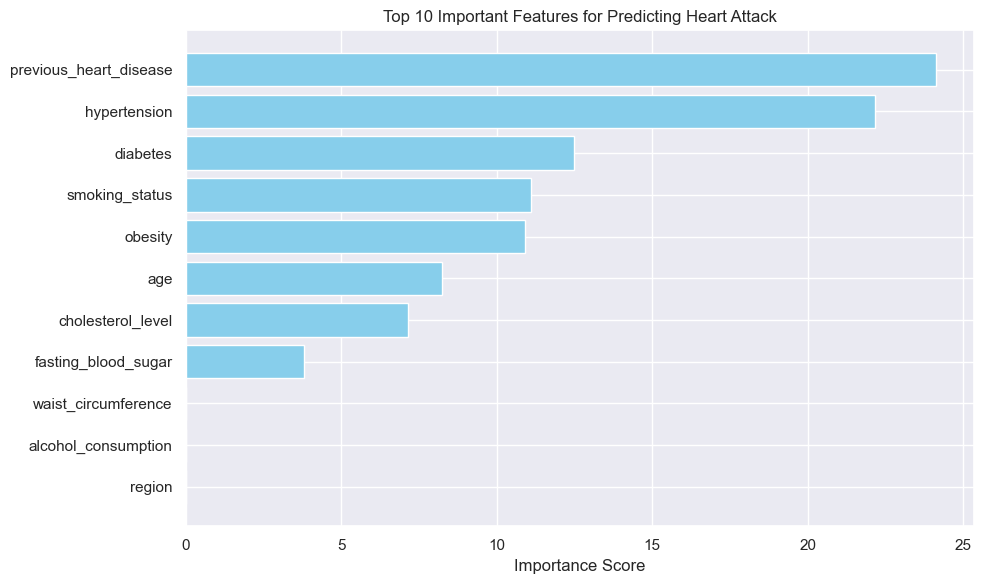

In [58]:
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'][:11][::-1], importance_df['Importance'][:11][::-1], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Top 10 Important Features for Predicting Heart Attack")
plt.tight_layout()
plt.show()


Reliability of CatBoost model

In [59]:
# Print classification results
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_probs))

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.83      0.79     18906
           1       0.71      0.59      0.65     12765

    accuracy                           0.74     31671
   macro avg       0.73      0.71      0.72     31671
weighted avg       0.74      0.74      0.73     31671

Confusion Matrix:
[[15780  3126]
 [ 5170  7595]]
ROC AUC Score: 0.8180597173001242


**AUC = 0.818: Decent but not perfect** 




### Implications
Both models corroborate each other, concluding that the **top 8 important** features of predicting heart attacks are
- **previous_heart_disease**
- **hypertension**
- **diabetes**
- **smoking_status**
- **obesity**
- **age**
- **cholesterol_level**
- **fasting_blood_sugar**

While both models highlight similar variables, the Decision Tree offers greater interpretability. It not only identifies which features are important, but also illustrates how they interact with one another through clear, rule-based splits. 

### Recommendation

Based on the analysis and the high heart attack rate (> 0.55), patients should be particularly vigilant about the following conditions, as they significantly increase the risk of a heart attack:

- Cholesterol level > 325.5
- Previous heart disease
- Waist circumference > 142.5
- Hypertension
- Fasting blood sugar > 151.5
- Diabetes

Patients with any of these conditions should take proactive steps toward heart health management, including regular monitoring, lifestyle changes, and consultation with healthcare providers.

For individuals without these conditions, monitoring the top 8 factors can serve as a guideline to prevent heart attacks by taking care of their health.\
Ageing individuals should do more health-checkups to ensure a healthy body.
Individuals with hypertension, diabetes should do regular checks on their blood pressure and blood sugar and follow treatment plan diligently. \
Smokers should quit smoking as it could reduce 20% of chance of heart attacks!\
To lower fasting blood sugar, individuals should exercise regularly, manage carbohydrate and fat intake, get plenty of sleep, limit sugar, sodium, fat, and processed foods, increase fiber intake and consume healthy fats and probiotics.tics.

---
## Learning something New

### 1. Kolmogorov-Smirnov(KS) test
- KS Statistic = how different the two distributions are in shape.
- KS p-value = small p-values indicate a statistically significant difference.
### 2. Separation Score
- Measures how well a feature can distinguish between classes\

Together, KS can tell you if there’s a meaningful difference in distributions, and Separation Score shows how useful that feature is for classification. Both help in selecting the most discriminative features. May reduce human error.

### 3. CatBoost
- Handles categorical features natively: It automatically processes categorical variables without needing to encode them manually.
- More efficient: CatBoost uses a technique called ordered boosting, which reduces overfitting and speeds up training.
- Robust to overfitting: With its built-in regularization techniques, CatBoost tends to perform well on small to medium-sized datasets.
- Better accuracy: It generally provides higher accuracy than traditional gradient boosting algorithms (like XGBoost) due to its specialized handling of categorical features.

But decision tree is still useful as it is robust to outliers: Trees can be relatively insensitive to outliers because they make decisions based on splits rather than distances between data points.









